# Importing libraries

In [2]:
import matplotlib.pyplot as plt
import pickle
from tensorflow import keras
import numpy as np
import os
from skimage.io import imshow, imread
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

# Input the dataset

In [3]:
PATH = 'D:/UCMerced_LandUse/Images/'

# we read all the folder names
ds = next(os.walk(PATH))[1]
    
x_train = []
y_train = []
x_test = []
y_test = []
label = 0
for i in ds:
    n = 0
    count = 0
    # we want to read all images in each folder, so it need to enter each folder
    myPicList = os.listdir(PATH+"/"+str(i))
    for img in myPicList:
        im = imread(PATH+"/"+str(i)+"/"+img)
        im = np.array(im)
        if((im.shape[0]==256) and (im.shape[1] ==256) and count <90):
            r = im[:,:,0]
            g = im[:,:,1]
            b = im[:,:,2]
            if(n<5):    
                x_test.append([r,g,b])
                y_test.append([label])
            else:
                x_train.append([r,g,b])
                y_train.append([label])
            n = n + 1
            count = count + 1
    label = label + 1
    

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
# The images of UCMerced Landsat dataset are 256*256
row_size = 256 
col_size = 256
# Just 3 folders has been selected
num_class = 3   


x_train = x_train.reshape(x_train.shape[0], row_size, col_size, 3)
x_test = x_test.reshape(x_test.shape[0], row_size, col_size, 3)

# taking the input shape for creating input layer of CNN
input_shape = (row_size, col_size, 3)
display(input_shape)

(256, 256, 3)

In [6]:
# Normalize the input
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [7]:
''' y: class vector to be converted into a matrix (integers from 0 to num_classes).
num_classes: total number of classes. 
So when we pass num_classes=3 it expects elements of y to be in {0, 1, 2}. 
we could simply convert our data to this zero-based format: 
Y_train = keras.utils.to_categorical(y_train -1, 3) instead of this format:
Y_train = keras.utils.to_categorical(y_train, 3) '''

Y_train = keras.utils.to_categorical(y_train -1, 3)
Y_test = keras.utils.to_categorical(y_test -1, 3)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(255, 256, 256, 3)
(15, 256, 256, 3)
(255, 3)
(15, 3)


# Set up CNN model

In [9]:
model = Sequential() 

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding a dropout layer with score 0.25

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Here as 3 folders has been taken, the output shoulde have 3 layers
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
____

In [10]:
# Train the model and then check the accuracy
history = model.fit(x_train, Y_train, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, Y_test))
loss, accuracy = model.evaluate(x_test, Y_test, verbose=1)
print('\nloss: {}, accuracy: {}\n'.format(loss, accuracy))

Train on 255 samples, validate on 15 samples
Epoch 1/10
255/255 [==============================] - 52s 203ms/sample - loss: 5.9086 - acc: 0.3137 - val_loss: 1.3841 - val_acc: 0.6667
Epoch 2/10
255/255 [==============================] - 51s 199ms/sample - loss: 1.2209 - acc: 0.3804 - val_loss: 1.0630 - val_acc: 0.6667
Epoch 3/10
255/255 [==============================] - 52s 203ms/sample - loss: 1.0704 - acc: 0.3961 - val_loss: 0.9542 - val_acc: 0.3333
Epoch 4/10
255/255 [==============================] - 54s 211ms/sample - loss: 0.9466 - acc: 0.5882 - val_loss: 0.6472 - val_acc: 0.8667
Epoch 5/10
255/255 [==============================] - 52s 204ms/sample - loss: 0.8276 - acc: 0.6392 - val_loss: 0.8398 - val_acc: 0.6667
Epoch 6/10
255/255 [==============================] - 51s 201ms/sample - loss: 0.7573 - acc: 0.6745 - val_loss: 0.6510 - val_acc: 0.6667
Epoch 7/10
255/255 [==============================] - 51s 201ms/sample - loss: 0.5505 - acc: 0.7725 - val_loss: 0.7366 - val_acc: 0.6

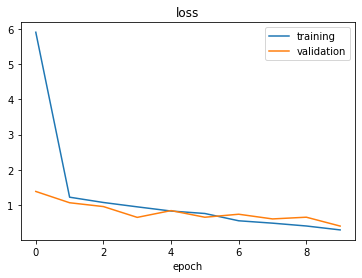

In [12]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()

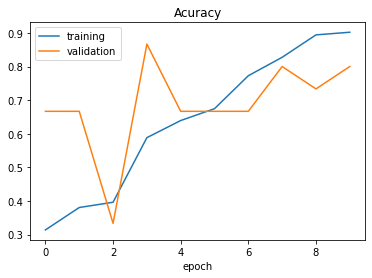

In [13]:
plt.figure(2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Acuracy')
plt.xlabel('epoch')
plt.show()